In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
from matplotlib import pyplot as plt

labels = ['cheo', 'diacau', 'muiten', 'sach', 'tamgiac', 'tinnhan', 'trong']
model = keras.models.load_model("model_v10.h5")

def crop_img(img):
    W = 400
    H = 820

    images = []
    sw=65
    rects = [
        (122, 7),
        (192, 7),
        (262, 7),
        (122, W-72),
        (192, W-72),
        (262, W-72),
    ]

    for i, (x,y) in enumerate(rects):
        img_crop = img[x:x+sw, y:y+sw]
        images.append(img_crop)
        
    cw = 100
    cx, cy = (H-cw)//2 + 10, (W-cw)//2
    img_crop = img[cx:cx+cw, cy:cy+cw]
    img_crop = cv2.resize(img_crop, (sw, sw))
    images.append(img_crop)
    return np.asarray(images)
    
def predict(images):
    images = images/255
    preds = model.predict(images)
#     print(preds.max(1))
    return [labels[i] for i in preds.argmax(1)]


def predict_arrow(preds):
    if preds[-1] == "cheo":
        return "xuong"
    if preds[-1] == "trong":
        return "khongbiet"
    if preds[-1] in preds[:3]:
        return "trai"
    if preds[-1] in preds[3:6]:
        return "phai"
    return "khongbiet"

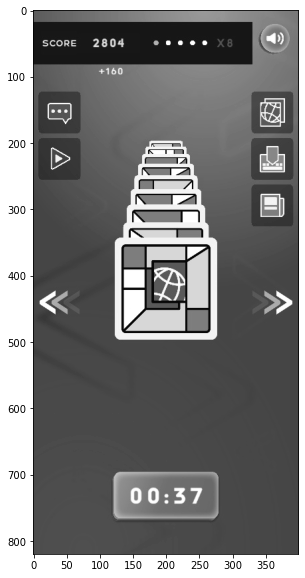

In [54]:
image = cv2.imread("screen.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")
plt.show()

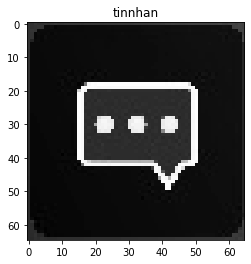

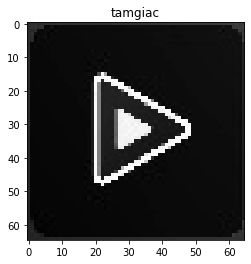

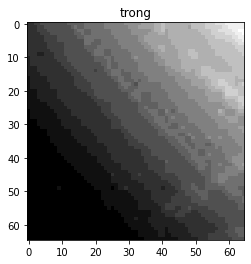

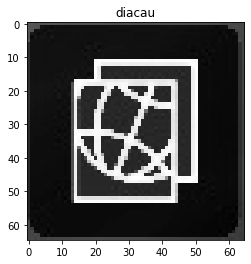

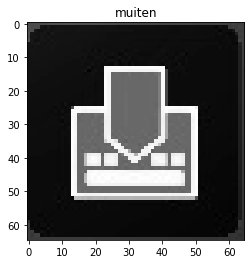

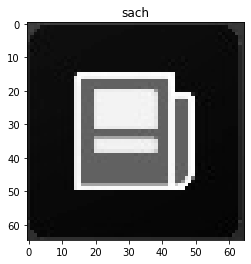

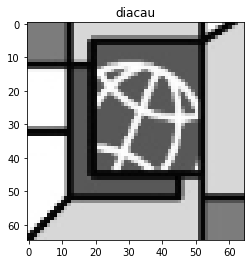

In [55]:
image = cv2.imread("screen.jpg")
crop_images = crop_img(image)
preds = predict(crop_images)
arrow = predict_arrow(preds)
for img, pred in zip(crop_images, preds):
    plt.imshow(img, cmap="gray")
    plt.title(pred)
    plt.show()

# Score

In [56]:
def count_score(frame):
    score = 0
    r = 20
    for i in range(1, frame + 1):
        score += r
        if i % 5==0:
            r += 20
    return score


In [58]:
def get_swipe_map(score):
    target_score = score
    score_map = {i: count_score(i) for i in range(1, 200)}
    num_swipe = 0
    swipe_check = []
    for i, s in sorted(score_map.items(), reverse=True):
        if s <= score:
            n = score//s
            for _ in range(n):
    #             print(i, True)
                swipe_check += [True] * i
                score -= s
                num_swipe += i
                if not score: break
    #             print(1, False)
                swipe_check += [False]
                score -= 20
                num_swipe += 1
                if not score: break
    
    delay_time = 55/num_swipe-0.1
    print(target_score, num_swipe, delay_time)
    swipe_check = {i+1:c for i, c in enumerate(swipe_check[::-1])}
    return swipe_check, delay_time

score = 22980
map_swipe = get_swipe_map(score)

22980 115 0.37826086956521743
